In [1]:
#learn a (1D) curve

import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
import torch.optim as optim

import torch.nn as nn
import torch.nn.functional as F

#import mpld3
#mpld3.enable_notebook()

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1,2)
        #self.fc2 = nn.Linear(10,10)
        self.fc3 = nn.Linear(2,1)
        self.act = F.relu
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        #x = self.fc2(x)
        #x = self.act(x)
        x = self.fc3(x)
        return x

In [3]:
def f(x):
    return 500*torch.sin(x) + 1000

def noise(x):
    return 0



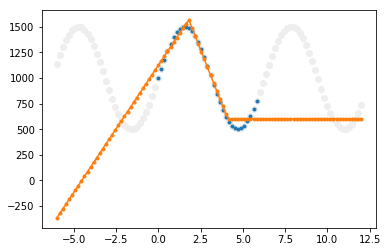

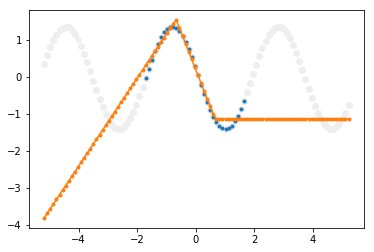

In [15]:
net = Net()
mse = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

x = Variable(torch.rand(10000,1)*6)
mean = x.mean()
std = x.std()

y_ = f(x)
ymean = y_.mean()
ystd = y_.std()

normalizeX = True
normalizeY = True

for _ in range(4000):
    x = Variable(torch.rand(10,1)*6)
    y_ = f(x)
    
    if normalizeX:
        x = (x-mean)/std
    if normalizeY:
        y_ = (y_-ymean)/ystd
    
    y = net(x)
    loss = mse(y, y_)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

#test data
x = Variable(torch.linspace(-6,12).resize_(100,1))
y_ = f(x)
y = net(x)

if normalizeX:
    x1 = (x-mean)/std
else:
    x1 = x

if normalizeY:
    y1_= (y_-ymean)/ystd
    y1 = net(x1)
    y = y1*ystd+ymean
else:
    y1_= y_
    y1 = net(x1)


#plt.subplot(211)
plt.plot(x.data.numpy(), y_.data.numpy(), 'o',c='#eeeeee')
plt.plot(x.data.numpy()[33:66], y_.data.numpy()[33:66], '.')
plt.plot(x.data.numpy(), y.data.numpy(), '.-')
# plt.subplot(212)
plt.figure()
plt.plot(x1.data.numpy(), y1_.data.numpy(), 'o',c='#eeeeee')
plt.plot(x1.data.numpy()[33:66], y1_.data.numpy()[33:66], '.')
plt.plot(x1.data.numpy(), y1.data.numpy(), '.-')
plt.show()

In [16]:
for i in list(net.parameters()):
    print i
    pass

Parameter containing:
-1.6370
-1.4330
[torch.FloatTensor of size 2x1]

Parameter containing:
-1.1045
 0.9395
[torch.FloatTensor of size 2]

Parameter containing:
-1.9657  1.4123
[torch.FloatTensor of size 1x2]

Parameter containing:
-1.1346
[torch.FloatTensor of size 1]



In [6]:
x

Variable containing:
 -6.0000
 -5.8182
 -5.6364
 -5.4545
 -5.2727
 -5.0909
 -4.9091
 -4.7273
 -4.5455
 -4.3636
 -4.1818
 -4.0000
 -3.8182
 -3.6364
 -3.4545
 -3.2727
 -3.0909
 -2.9091
 -2.7273
 -2.5455
 -2.3636
 -2.1818
 -2.0000
 -1.8182
 -1.6364
 -1.4545
 -1.2727
 -1.0909
 -0.9091
 -0.7273
 -0.5455
 -0.3636
 -0.1818
  0.0000
  0.1818
  0.3636
  0.5455
  0.7273
  0.9091
  1.0909
  1.2727
  1.4545
  1.6364
  1.8182
  2.0000
  2.1818
  2.3636
  2.5455
  2.7273
  2.9091
  3.0909
  3.2727
  3.4545
  3.6364
  3.8182
  4.0000
  4.1818
  4.3636
  4.5455
  4.7273
  4.9091
  5.0909
  5.2727
  5.4545
  5.6364
  5.8182
  6.0000
  6.1818
  6.3636
  6.5455
  6.7273
  6.9091
  7.0909
  7.2727
  7.4545
  7.6364
  7.8182
  8.0000
  8.1818
  8.3636
  8.5455
  8.7273
  8.9091
  9.0909
  9.2727
  9.4545
  9.6364
  9.8182
 10.0000
 10.1818
 10.3636
 10.5455
 10.7273
 10.9091
 11.0909
 11.2727
 11.4545
 11.6364
 11.8182
 12.0000
[torch.FloatTensor of size 100x1]